<a href="https://colab.research.google.com/github/luissanty2/TFGRecursos/blob/main/ModeloInicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
#%pip install git+https://github.com/slundberg/shap.git
#import shap

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#df = pd.read_csv('Data.csv', encoding = 'latin1')
df = pd.read_csv('https://raw.githubusercontent.com/luissanty2/TFGRecursos/main/dataset_final.csv')

num_val = ['match_duration', 'p1_aces', 'p2_aces', 'p1_double_faults', 'p2_double_faults', 'p1_first_serves_in', 'p2_first_serves_in', 'p2_first_serve_points_won','p1_first_serve_points_won', 'p1_second_serves_in',
       'p2_second_serves_in', 'p1_sets_won', 'p2_sets_won', 'p1_games_won', 'p2_games_won', 'p1_ranking_points', 'p2_ranking_points']

cat_val = ['surface','tourney_round_name']

df.head()

,Unnamed: 0,match_duration,p1_aces,p2_aces,p1_double_faults,p2_double_faults,p1_first_serves_in,p2_first_serves_in,p2_first_serve_points_won,p1_first_serve_points_won,...,p1_name,p2_name,p1_sets_won,p2_sets_won,p1_games_won,p2_games_won,surface,p1_ranking_points,p2_ranking_points,y
0,0,91.0,7.0,8.0,0.042254,0.061728,0.577465,0.432099,0.800000,0.682927,...,Magnus Norman,Thomas Enqvist,1,2,10,15,Hard,2083.0,1489.0,1
1,1,115.0,10.0,4.0,0.049383,0.012195,0.444444,0.487805,0.650000,0.750000,...,Nicolas Escude,Lleyton Hewitt,1,2,11,15,Hard,1026.0,1430.0,1
2,2,96.0,8.0,7.0,0.012658,0.055556,0.556962,0.416667,0.866667,0.795455,...,Thomas Enqvist,Lleyton Hewitt,1,2,11,15,Hard,1489.0,1430.0,1
3,3,96.0,8.0,5.0,0.022472,0.044118,0.426966,0.514706,0.828571,0.631579,...,Sebastien Grosjean,Thomas Enqvist,0,2,11,14,Hard,1187.0,1489.0,1
4,4,75.0,2.0,2.0,0.090909,0.020000,0.560606,0.620000,0.838710,0.567568,...,Tim Henman,Nicolas Escude,0,2,4,12,Hard,1614.0,1026.0,1


Se pasan datos categóricos a numéricos

In [ ]:
df = pd.get_dummies(df, columns=cat_val)
df.columns

Index(['Unnamed: 0', 'match_duration', 'p1_aces', 'p2_aces',
       'p1_double_faults', 'p2_double_faults', 'p1_first_serves_in',
       'p2_first_serves_in', 'p2_first_serve_points_won',
       'p1_first_serve_points_won', 'p1_second_serves_in',
       'p2_second_serves_in', 'p1_name', 'p2_name', 'p1_sets_won',
       'p2_sets_won', 'p1_games_won', 'p2_games_won', 'p1_ranking_points',
       'p2_ranking_points', 'y', 'surface_Clay', 'surface_Grass',
       'surface_Hard', 'tourney_round_name_1st Round Qualifying',
       'tourney_round_name_2nd Round Qualifying',
       'tourney_round_name_3rd Round Qualifying', 'tourney_round_name_Finals',
       'tourney_round_name_Olympic Bronze',
       'tourney_round_name_Quarter-Finals', 'tourney_round_name_Round Robin',
       'tourney_round_name_Round of 128', 'tourney_round_name_Round of 16',
       'tourney_round_name_Round of 32', 'tourney_round_name_Round of 64',
       'tourney_round_name_Semi-Finals'],
      dtype='object')

Normalizacion


In [ ]:
df[num_val]=(df[num_val]-df[num_val].mean())/df[num_val].std()
df.fillna(0)

,Unnamed: 0,match_duration,p1_aces,p2_aces,p1_double_faults,p2_double_faults,p1_first_serves_in,p2_first_serves_in,p2_first_serve_points_won,p1_first_serve_points_won,...,tourney_round_name_3rd Round Qualifying,tourney_round_name_Finals,tourney_round_name_Olympic Bronze,tourney_round_name_Quarter-Finals,tourney_round_name_Round Robin,tourney_round_name_Round of 128,tourney_round_name_Round of 16,tourney_round_name_Round of 32,tourney_round_name_Round of 64,tourney_round_name_Semi-Finals
0,0,-0.307628,0.256030,0.475962,0.124763,0.813066,-0.302674,-2.050503,0.872590,-0.254457,...,0,0,0,0,0,0,0,0,0,1
1,1,0.310229,0.846813,-0.331964,0.368320,-0.915773,-1.877263,-1.384093,-0.573280,0.380392,...,0,0,0,0,0,0,0,0,0,1
2,2,-0.178908,0.452957,0.273980,-0.886312,0.597618,-0.545369,-2.235117,1.515198,0.810621,...,0,1,0,0,0,0,0,0,0,0
3,3,-0.178908,0.452957,-0.129983,-0.551043,0.198406,-2.084156,-1.062277,1.147993,-0.740466,...,0,0,0,1,0,0,0,0,0,0
4,4,-0.719533,-0.728609,-0.735927,1.787001,-0.643362,-0.502234,0.197353,1.245717,-1.346336,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58795,58795,-0.899742,0.256030,0.677943,1.626359,0.347421,-0.607371,-0.852301,-0.120533,0.971956,...,0,0,0,0,0,0,0,0,0,0
58796,58796,-1.054206,0.256030,0.677943,-0.591879,1.116514,-0.590002,-1.322449,0.872590,1.290491,...,0,0,0,0,0,0,0,0,0,0
58797,58797,0.078533,2.225307,-0.129983,0.714774,-0.701000,-0.092288,0.901960,-0.716564,1.610845,...,0,0,0,0,0,0,0,0,0,0
58798,58798,-0.771021,0.256030,0.071999,-0.179980,2.417326,-1.022354,-2.618545,-0.284106,0.914708,...,0,0,0,0,0,0,0,0,0,0


Creación de tests:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
Y = df['y']
df = df.drop(['y'], axis=1)
X = df
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

X_train = X_train.drop(['p1_name'], axis=1)
X_train = X_train.drop(['p2_name'], axis=1)

test_names = []
for index, row in X_test.iterrows():
    v = []
    v.append(row['p1_name'])
    v.append(row['p2_name'])
    test_names.append(v)

X_test = X_test.drop(['p1_name'], axis=1)
X_test = X_test.drop(['p2_name'], axis=1)

Regresión

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()


param_grid = {
    'C' : np.logspace(0, 4, num=10),
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear','sag']
}



search = RandomizedSearchCV(modelo, param_grid, n_iter=5, cv=10, scoring='accuracy', random_state=1, n_jobs=-1)

result = search.fit(X_train, y_train)

best_random = result.best_estimator_
y_pred_test = best_random.predict(X_test)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Score: 0.9617346938775512
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8814
           1       1.00      0.93      0.96      8826

    accuracy                           0.96     17640
   macro avg       0.97      0.96      0.96     17640
weighted avg       0.97      0.96      0.96     17640



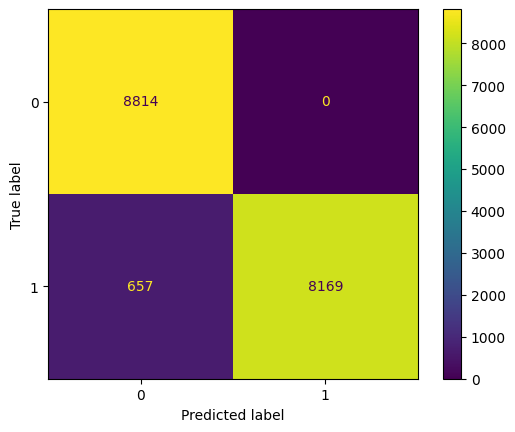

In [ ]:
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()